In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import operator

In [2]:
d=pd.read_csv('time_series_2019-ncov-Confirmed.csv')
d

Province/State Country/Region       Lat      Long  1/22/20  1/23/20  \
0              NaN       Thailand        15       101        2        3   
1              NaN          Japan        36       138        2        1   
2              NaN      Singapore    1.2833  103.8333        0        1   
3              NaN          Nepal   28.1667     84.25        0        0   
4              NaN       Malaysia       2.5     112.5        0        0   
..             ...            ...       ...       ...      ...      ...   
482            NaN       Dominica    15.415   /61.371        0        0   
483            NaN        Grenada   12.1165   /61.679        0        0   
484            NaN     Mozambique  /18.6657   35.5296        0        0   
485            NaN          Syria   34.8021   38.9968        0        0   
486            NaN    Timor/Leste   /8.8742  125.7275        0        0   

     1/24/20  1/25/20  1/26/20  1/27/20  ...  3/13/20  3/14/20  3/15/20  \
0          5        7        8        8  ...       75       82      114   
1          2        2        4        4  ...      701      773      839   
2          3        3        4        5  ...      200      212      226   
3          0        1        1        1  ...        1        1        1   
4          0        3        4        4  ...      197      238      428   
..       ...      ...      ...      ...  ...      ...      ...      ...   
482        0        0        0        0  ...        0        0        0   
483        0        0        0        0  ...        0        0        0   
484        0        0        0        0  ...        0        0        0   
485        0        0        0        0  ...        0        0        0   
486        0        0        0        0  ...        0        0        0   

     3/16/20  3/17/20  3/18/20  3/19/20  3/20/20  3/21/20  3/22/20  
0        147      177      212      272      322      411      599  
1        825      878      889      924      963     1007     1086  
2        243      266      313      345      385      432      455  
3          1        1        1        1        1        1        2  
4        566      673      790      900     1030     1183     1306  
..       ...      ...      ...      ...      ...      ...      ...  
482        0        0        0        0        0        0        1  
483        0        0        0        0        0        0        1  
484        0        0        0        0        0        0        1  
485        0        0        0        0        0        0        1  
486        0        0        0        0        0        0        1  

[487 rows x 65 columns]

In [3]:
draft=d.copy()

In [4]:
x=d['Country/Region']

In [5]:
a=d.columns
b=list(a[4:])
type(b)
b

['1/22/20',
 '1/23/20',
 '1/24/20',
 '1/25/20',
 '1/26/20',
 '1/27/20',
 '1/28/20',
 '1/29/20',
 '1/30/20',
 '1/31/20',
 '02-01-2020',
 '02-02-2020',
 '02-03-2020',
 '02-04-2020',
 '02-05-2020',
 '02-06-2020',
 '02-07-2020',
 '02-08-2020',
 '02-09-2020',
 '02-10-2020',
 '02-11-2020',
 '02-12-2020',
 '2/13/20',
 '2/14/20',
 '2/15/20',
 '2/16/20',
 '2/17/20',
 '2/18/20',
 '2/19/20',
 '2/20/20',
 '2/21/20',
 '2/22/20',
 '2/23/20',
 '2/24/20',
 '2/25/20',
 '2/26/20',
 '2/27/20',
 '2/28/20',
 '2/29/20',
 '03-01-2020',
 '03-02-2020',
 '03-03-2020',
 '03-04-2020',
 '03-05-2020',
 '03-06-2020',
 '03-07-2020',
 '03-08-2020',
 '03-09-2020',
 '03-10-2020',
 '03-11-2020',
 '03-12-2020',
 '3/13/20',
 '3/14/20',
 '3/15/20',
 '3/16/20',
 '3/17/20',
 '3/18/20',
 '3/19/20',
 '3/20/20',
 '3/21/20',
 '3/22/20']

In [6]:
d.keys()

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20', '1/28/20', '1/29/20',
       '1/30/20', '1/31/20', '02-01-2020', '02-02-2020', '02-03-2020',
       '02-04-2020', '02-05-2020', '02-06-2020', '02-07-2020', '02-08-2020',
       '02-09-2020', '02-10-2020', '02-11-2020', '02-12-2020', '2/13/20',
       '2/14/20', '2/15/20', '2/16/20', '2/17/20', '2/18/20', '2/19/20',
       '2/20/20', '2/21/20', '2/22/20', '2/23/20', '2/24/20', '2/25/20',
       '2/26/20', '2/27/20', '2/28/20', '2/29/20', '03-01-2020', '03-02-2020',
       '03-03-2020', '03-04-2020', '03-05-2020', '03-06-2020', '03-07-2020',
       '03-08-2020', '03-09-2020', '03-10-2020', '03-11-2020', '03-12-2020',
       '3/13/20', '3/14/20', '3/15/20', '3/16/20', '3/17/20', '3/18/20',
       '3/19/20', '3/20/20', '3/21/20', '3/22/20'],
      dtype='object')

In [7]:
d.describe()

1/22/20     1/23/20     1/24/20     1/25/20      1/26/20  \
count  487.000000  487.000000  487.000000  487.000000   487.000000   
mean     1.139630    1.340862    1.932238    2.944559     4.349076   
std     20.170391   20.253507   25.229268   35.129844    49.109575   
min      0.000000    0.000000    0.000000    0.000000     0.000000   
25%      0.000000    0.000000    0.000000    0.000000     0.000000   
50%      0.000000    0.000000    0.000000    0.000000     0.000000   
75%      0.000000    0.000000    0.000000    0.000000     0.000000   
max    444.000000  444.000000  549.000000  761.000000  1058.000000   

           1/27/20      1/28/20      1/29/20      1/30/20      1/31/20  ...  \
count   487.000000   487.000000   487.000000   487.000000   487.000000  ...   
mean      6.010267    11.453799    12.661191    16.907598    20.383984  ...   
std      66.178567   162.190044   163.249708   224.934544   266.700712  ...   
min       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
25%       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
50%       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
75%       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
max    1423.000000  3554.000000  3554.000000  4903.000000  5806.000000  ...   

            3/13/20       3/14/20       3/15/20       3/16/20       3/17/20  \
count    487.000000    487.000000    487.000000    487.000000    487.000000   
mean     298.137577    320.521561    343.831622    372.745380    404.809035   
std     3248.509243   3309.559050   3380.171621   3463.800169   3561.212709   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      1.000000      1.000000      1.000000      1.000000   
75%       17.000000     26.000000     31.000000     39.000000     56.000000   
max    67786.000000  67790.000000  67794.000000  67798.000000  67799.000000   

            3/18/20       3/19/20       3/20/20       3/21/20       3/22/20  
count    487.000000    487.000000    487.000000    487.000000    487.000000  
mean     441.293634    498.373717    558.862423    625.305955    689.845996  
std     3693.726599   3886.851115   4121.144328   4397.961371   4658.551576  
min        0.000000      0.000000      0.000000      0.000000      0.000000  
25%        0.000000      0.000000      0.000000      0.000000      0.000000  
50%        2.000000      2.000000      3.000000      3.000000      4.000000  
75%       68.000000     80.500000     92.000000    125.000000    138.500000  
max    67800.000000  67800.000000  67800.000000  67800.000000  67800.000000  

[8 rows x 61 columns]

In [8]:
key=d.describe().keys()
key

Index(['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       '1/28/20', '1/29/20', '1/30/20', '1/31/20', '02-01-2020', '02-02-2020',
       '02-03-2020', '02-04-2020', '02-05-2020', '02-06-2020', '02-07-2020',
       '02-08-2020', '02-09-2020', '02-10-2020', '02-11-2020', '02-12-2020',
       '2/13/20', '2/14/20', '2/15/20', '2/16/20', '2/17/20', '2/18/20',
       '2/19/20', '2/20/20', '2/21/20', '2/22/20', '2/23/20', '2/24/20',
       '2/25/20', '2/26/20', '2/27/20', '2/28/20', '2/29/20', '03-01-2020',
       '03-02-2020', '03-03-2020', '03-04-2020', '03-05-2020', '03-06-2020',
       '03-07-2020', '03-08-2020', '03-09-2020', '03-10-2020', '03-11-2020',
       '03-12-2020', '3/13/20', '3/14/20', '3/15/20', '3/16/20', '3/17/20',
       '3/18/20', '3/19/20', '3/20/20', '3/21/20', '3/22/20'],
      dtype='object')

In [9]:
d_try=d.groupby('Country/Region').sum()
d_try[d_try['2/28/20']==0]

1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  \
Country/Region                                                              
Albania                    0        0        0        0        0        0   
Algeria                    0        0        0        0        0        0   
Andorra                    0        0        0        0        0        0   
Angola                     0        0        0        0        0        0   
Antigua and Barbuda        0        0        0        0        0        0   
...                      ...      ...      ...      ...      ...      ...   
Uruguay                    0        0        0        0        0        0   
Uzbekistan                 0        0        0        0        0        0   
Venezuela                  0        0        0        0        0        0   
Zambia                     0        0        0        0        0        0   
Zimbabwe                   0        0        0        0        0        0   

                     1/28/20  1/29/20  1/30/20  1/31/20  ...  3/13/20  \
Country/Region                                           ...            
Albania                    0        0        0        0  ...       33   
Algeria                    0        0        0        0  ...       26   
Andorra                    0        0        0        0  ...        1   
Angola                     0        0        0        0  ...        0   
Antigua and Barbuda        0        0        0        0  ...        1   
...                      ...      ...      ...      ...  ...      ...   
Uruguay                    0        0        0        0  ...        0   
Uzbekistan                 0        0        0        0  ...        0   
Venezuela                  0        0        0        0  ...        0   
Zambia                     0        0        0        0  ...        0   
Zimbabwe                   0        0        0        0  ...        0   

                     3/14/20  3/15/20  3/16/20  3/17/20  3/18/20  3/19/20  \
Country/Region                                                              
Albania                   38       42       51       55       59       64   
Algeria                   37       48       54       60       74       87   
Andorra                    1        1        2       39       39       53   
Angola                     0        0        0        0        0        0   
Antigua and Barbuda        1        1        1        1        1        1   
...                      ...      ...      ...      ...      ...      ...   
Uruguay                    4        4        8       29       50       79   
Uzbekistan                 0        1        6       10       15       23   
Venezuela                  2       10       17       33       36       42   
Zambia                     0        0        0        0        2        2   
Zimbabwe                   0        0        0        0        0        0   

                     3/20/20  3/21/20  3/22/20  
Country/Region                                  
Albania                   70       76       89  
Algeria                   90      139      201  
Andorra                   75       88      113  
Angola                     1        2        2  
Antigua and Barbuda        1        1        1  
...                      ...      ...      ...  
Uruguay                   94      110      135  
Uzbekistan                33       43       43  
Venezuela                 42       70       70  
Zambia                     2        2        3  
Zimbabwe                   1        3        3  

[126 rows x 61 columns]

In [10]:
drop_column=list()
for i in range(len(key)):
    count=0
    for j in range(487):
        if(d.iloc[j][i+4]==0):
           count=count+1
    per=count/487
    if(per>0.71):
        drop_column.append(key[i])
drop_column

['1/22/20',
 '1/23/20',
 '1/24/20',
 '1/25/20',
 '1/26/20',
 '1/27/20',
 '1/28/20',
 '1/29/20',
 '1/30/20',
 '1/31/20',
 '02-01-2020',
 '02-02-2020',
 '02-03-2020',
 '02-04-2020',
 '02-05-2020',
 '02-06-2020',
 '02-07-2020',
 '02-08-2020',
 '02-09-2020',
 '02-10-2020',
 '02-11-2020',
 '02-12-2020',
 '2/13/20',
 '2/14/20',
 '2/15/20',
 '2/16/20',
 '2/17/20',
 '2/18/20',
 '2/19/20',
 '2/20/20',
 '2/21/20',
 '2/22/20',
 '2/23/20',
 '2/24/20',
 '2/25/20',
 '2/26/20',
 '2/27/20',
 '2/28/20',
 '2/29/20',
 '03-01-2020',
 '03-02-2020',
 '03-03-2020']

In [11]:
d=pd.read_csv('time_series_2019-ncov-Confirmed.csv')
d
for i in drop_column:
    d=d.drop(i, axis=1)

In [12]:
d

Province/State Country/Region       Lat      Long  03-04-2020  03-05-2020  \
0              NaN       Thailand        15       101          43          47   
1              NaN          Japan        36       138         331         360   
2              NaN      Singapore    1.2833  103.8333         110         117   
3              NaN          Nepal   28.1667     84.25           1           1   
4              NaN       Malaysia       2.5     112.5          50          50   
..             ...            ...       ...       ...         ...         ...   
482            NaN       Dominica    15.415   /61.371           0           0   
483            NaN        Grenada   12.1165   /61.679           0           0   
484            NaN     Mozambique  /18.6657   35.5296           0           0   
485            NaN          Syria   34.8021   38.9968           0           0   
486            NaN    Timor/Leste   /8.8742  125.7275           0           0   

     03-06-2020  03-07-2020  03-08-2020  03-09-2020  ...  3/13/20  3/14/20  \
0            48          50          50          50  ...       75       82   
1           420         461         502         511  ...      701      773   
2           130         138         150         150  ...      200      212   
3             1           1           1           1  ...        1        1   
4            83          93          99         117  ...      197      238   
..          ...         ...         ...         ...  ...      ...      ...   
482           0           0           0           0  ...        0        0   
483           0           0           0           0  ...        0        0   
484           0           0           0           0  ...        0        0   
485           0           0           0           0  ...        0        0   
486           0           0           0           0  ...        0        0   

     3/15/20  3/16/20  3/17/20  3/18/20  3/19/20  3/20/20  3/21/20  3/22/20  
0        114      147      177      212      272      322      411      599  
1        839      825      878      889      924      963     1007     1086  
2        226      243      266      313      345      385      432      455  
3          1        1        1        1        1        1        1        2  
4        428      566      673      790      900     1030     1183     1306  
..       ...      ...      ...      ...      ...      ...      ...      ...  
482        0        0        0        0        0        0        0        1  
483        0        0        0        0        0        0        0        1  
484        0        0        0        0        0        0        0        1  
485        0        0        0        0        0        0        0        1  
486        0        0        0        0        0        0        0        1  

[487 rows x 23 columns]

In [13]:
d_covid=d.groupby('Country/Region').sum()
d_covid

03-04-2020  03-05-2020  03-06-2020  03-07-2020  03-08-2020  \
Country/Region                                                               
Afghanistan              1           1           1           1           4   
Albania                  0           0           0           0           0   
Algeria                 12          12          17          17          19   
Andorra                  1           1           1           1           1   
Angola                   0           0           0           0           0   
...                    ...         ...         ...         ...         ...   
Uzbekistan               0           0           0           0           0   
Venezuela                0           0           0           0           0   
Vietnam                 16          16          16          18          30   
Zambia                   0           0           0           0           0   
Zimbabwe                 0           0           0           0           0   

                03-09-2020  03-10-2020  03-11-2020  03-12-2020  3/13/20  \
Country/Region                                                            
Afghanistan              4           5           7           7        7   
Albania                  2          10          12          23       33   
Algeria                 20          20          20          24       26   
Andorra                  1           1           1           1        1   
Angola                   0           0           0           0        0   
...                    ...         ...         ...         ...      ...   
Uzbekistan               0           0           0           0        0   
Venezuela                0           0           0           0        0   
Vietnam                 30          31          38          39       47   
Zambia                   0           0           0           0        0   
Zimbabwe                 0           0           0           0        0   

                3/14/20  3/15/20  3/16/20  3/17/20  3/18/20  3/19/20  3/20/20  \
Country/Region                                                                  
Afghanistan          11       16       21       22       22       22       24   
Albania              38       42       51       55       59       64       70   
Algeria              37       48       54       60       74       87       90   
Andorra               1        1        2       39       39       53       75   
Angola                0        0        0        0        0        0        1   
...                 ...      ...      ...      ...      ...      ...      ...   
Uzbekistan            0        1        6       10       15       23       33   
Venezuela             2       10       17       33       36       42       42   
Vietnam              53       56       61       66       75       85       91   
Zambia                0        0        0        0        2        2        2   
Zimbabwe              0        0        0        0        0        0        1   

                3/21/20  3/22/20  
Country/Region                    
Afghanistan          24       40  
Albania              76       89  
Algeria             139      201  
Andorra              88      113  
Angola                2        2  
...                 ...      ...  
Uzbekistan           43       43  
Venezuela            70       70  
Vietnam              94      113  
Zambia                2        3  
Zimbabwe              3        3  

[171 rows x 19 columns]

In [14]:
country_dict=dict()
for i in range(487):
    country_dict[d.iloc[i][1]]=country_dict.get(d.iloc[i][1],0)+d.iloc[i][-1]
for item in country_dict:
    print("Country:{} Cases:{}".format(item,country_dict[item]))
print(len(country_dict))

Country:Thailand Cases:599
Country:Japan Cases:1086
Country:Singapore Cases:455
Country:Nepal Cases:2
Country:Malaysia Cases:1306
Country:Canada Cases:1465
Country:Australia Cases:1314
Country:Cambodia Cases:84
Country:Sri Lanka Cases:82
Country:Germany Cases:24873
Country:Finland Cases:626
Country:United Arab Emirates Cases:153
Country:Philippines Cases:380
Country:India Cases:396
Country:Italy Cases:59138
Country:Sweden Cases:1934
Country:Spain Cases:28768
Country:Belgium Cases:3401
Country:Egypt Cases:327
Country:Lebanon Cases:248
Country:Iraq Cases:233
Country:Oman Cases:55
Country:Afghanistan Cases:40
Country:Bahrain Cases:332
Country:Kuwait Cases:188
Country:Algeria Cases:201
Country:Croatia Cases:254
Country:Switzerland Cases:7245
Country:Austria Cases:3244
Country:Israel Cases:1071
Country:Pakistan Cases:776
Country:Brazil Cases:1593
Country:Georgia Cases:54
Country:Greece Cases:624
Country:North Macedonia Cases:114
Country:Norway Cases:2383
Country:Romania Cases:433
Country:Es

In [15]:
plt.figure(figsize=(220, 110))
plt.pie(country_dict.values())
plt.title('Confirmed Cases on basis of Countries',size=100)
plt.legend(country_dict.keys(),loc="center left",prop={'size': 64})
plt.show()

In [16]:
dates=d.keys()
dates=dates[4:]
dates=list(dates)

In [17]:
cases_on_dates=[]
for i in dates:
    sum_of_cases=d_covid[i].sum()
    cases_on_dates.append(sum_of_cases)
    print(f'{i}: {sum_of_cases}')

03-04-2020: 95118
03-05-2020: 97881
03-06-2020: 101784
03-07-2020: 105821
03-08-2020: 109795
03-09-2020: 113561
03-10-2020: 118592
03-11-2020: 125865
03-12-2020: 128343
3/13/20: 145193
3/14/20: 156094
3/15/20: 167446
3/16/20: 181527
3/17/20: 197142
3/18/20: 214910
3/19/20: 242708
3/20/20: 272166
3/21/20: 304524
3/22/20: 335955


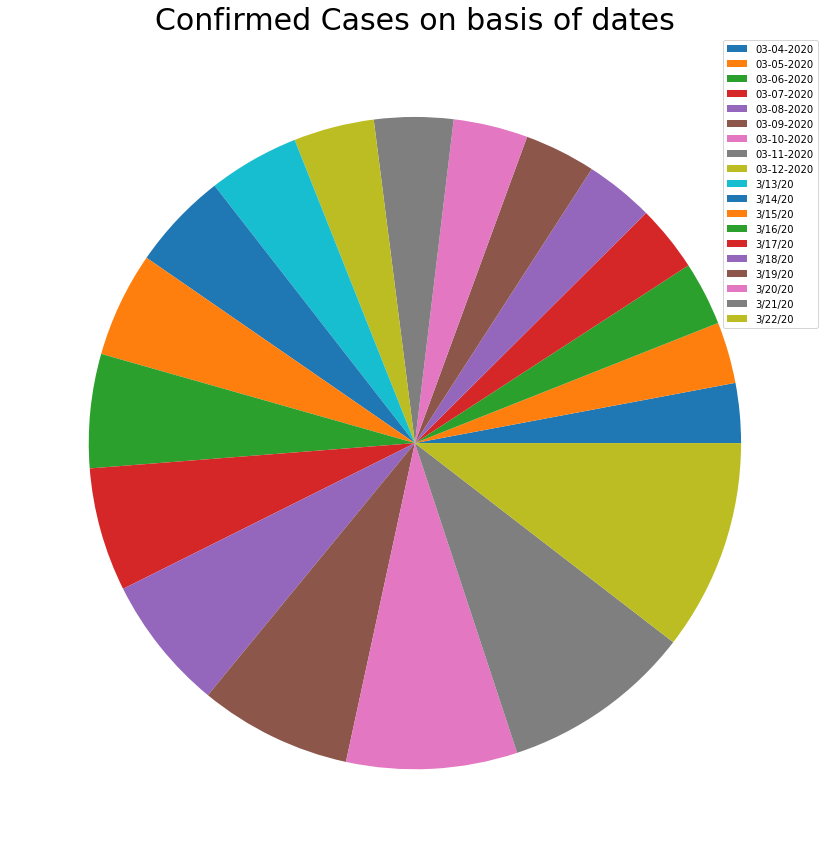

In [18]:
plt.figure(figsize=(15,15))
plt.pie(cases_on_dates)
plt.title('Confirmed Cases on basis of dates',size=30)
plt.legend(dates, loc='best')
plt.show()